In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
import os
wd = os.getcwd()
wd
df_red = pd.read_csv("documents/GitHub/ML100days/winequality_red.csv")
df_red
df_white = pd.read_csv("documents/GitHub/ML100days/winequality_white.csv")
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [18]:
#資料整理
df_red["color"] = "R"
df_white["color"] = "W"

#整合紅酒與白酒的資料
df_all=pd.concat([df_red,df_white],axis=0)

# 檢查合併後的資料集
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [19]:
df_all.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                       'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                       'free sulfur dioxide':'free_sulfur_dioxide',
                       'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
# 檢查合併後的資料集
df_all.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [22]:
#build a dummy variable
df = pd.get_dummies(df_all, columns=["color"])
df
#check null
df_all.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [23]:
df_all.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


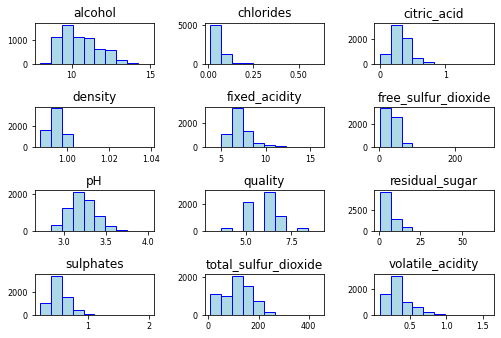

In [36]:
df_all.hist(bins=10, color='lightblue',edgecolor='blue',linewidth=1.0, #the linewidth of edge
          xlabelsize=8, ylabelsize=8, grid=False)    #font of x's label

plt.tight_layout(rect=(0, 0, 1.2, 1.2)) #(圖之間的距離,各圖的寬,各圖的高)

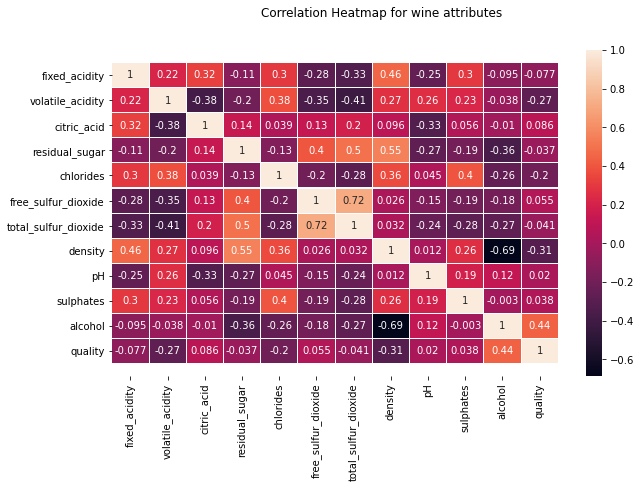

In [48]:
#Plotting heatmap
f, ax = plt.subplots(figsize=(10, 6))
b = sns.heatmap(df_all.corr(), annot=True, linewidths=0.05, ax=ax)  #annot是否顯示各方塊corr的值 #linewidths方塊的邊框
f.subplots_adjust(top=0.93)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
title= f.suptitle('Correlation Heatmap for wine attributes', fontsize=12)

In [45]:
ax

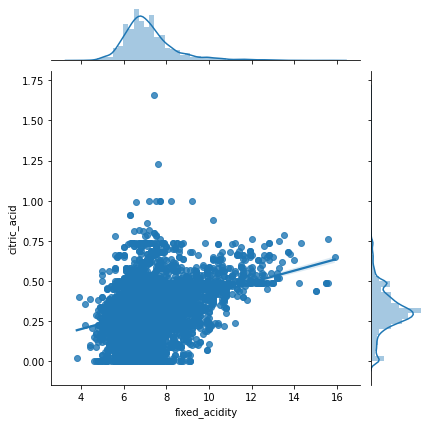

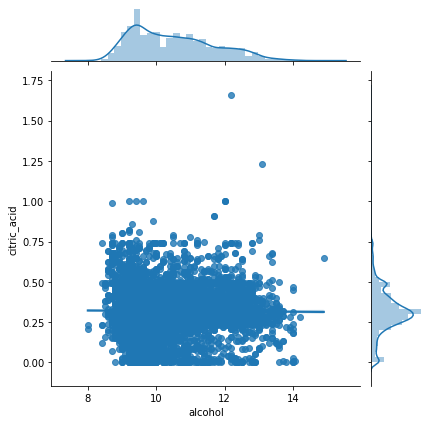

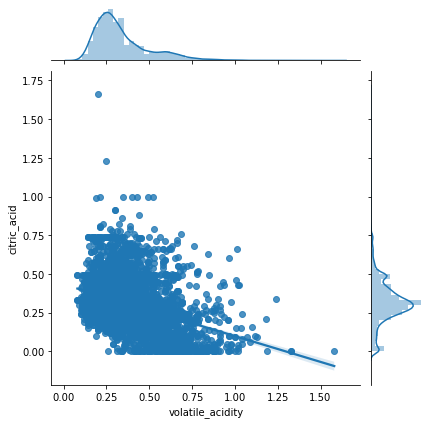

In [49]:
#Plotting Jointplot, 使用 'reg'== regression 回歸線繪製關係圖
a = sns.jointplot("fixed_acidity","citric_acid",data = df_all,kind ='reg', color = None)
b = sns.jointplot("alcohol", "citric_acid", data = df_all, kind = 'reg')
c = sns.jointplot("volatile_acidity", "citric_acid", data = df_all, kind = 'reg')